In [1]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
import Perceptron as Custom_Perceptron

# data exploration and pre-processing

In [2]:
df = pd.read_csv('../data/dirty_data.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)*2-1
df = pd.DataFrame(x_scaled).sample(frac=1)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8
381,-1.000000,0.055276,0.114754,-0.555556,-1.000000,-0.403875,-0.865073,-0.966667,-1.0
588,-0.647059,0.768844,0.409836,-0.454545,-0.631206,-0.007452,-0.081127,0.033333,1.0
207,-0.411765,0.628141,0.704918,-1.000000,-1.000000,0.123696,-0.937660,0.033333,1.0
602,-0.882353,0.246231,0.213115,-0.272727,-1.000000,-0.171386,-0.981213,-0.700000,-1.0
652,-0.411765,0.236181,0.213115,-0.191919,-0.817967,0.016393,-0.836892,-0.766667,-1.0


In [6]:
df_features=df[list(range(8))]
df_target=df[8]

# Importing our own little perceptron

In [50]:
baby = Custom_Perceptron.Perceptron(n_epochs=1000,training_step=0.1)

In [51]:
X_train = df_features.iloc[:600]
X_test = df_features.iloc[601:700]
X_val = df_features.iloc[701:]

y_train = df_target.iloc[:600]
y_test = df_target.iloc[601:700]
y_val = df_target.iloc[701:]

## training our baby

100%|██████████| 1000/1000 [00:05<00:00, 190.28it/s]


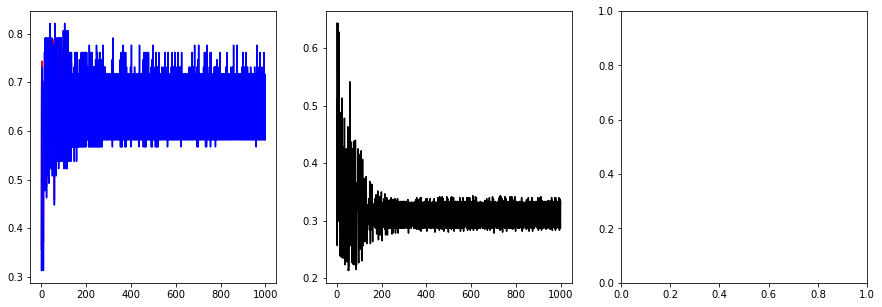

In [52]:
weights = baby.fit(X_train,y_train,X_val,y_val)
y_pred=baby.predict(X_test)
accuracy,loss,val_acc = baby.get_metrics()

In [53]:
baby.score(X_val,y_val)

0.582089552238806

# Validating our perceptron with linearly separable data

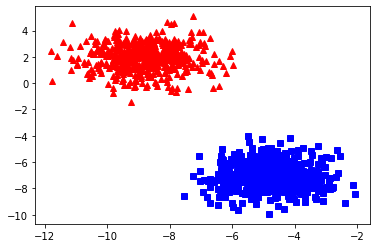

In [54]:
from sklearn import datasets
from sklearn.model_selection import train_test_split



X_2, y_2 = datasets.make_blobs(n_samples=1000, centers=2, n_features=2)
y_2 = -(y_2*2-1)

# X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.33, random_state=42)

fig,ax=plt.subplots(1,1)
ax.plot(X_2[:, 0][y_2 == -1], X_2[:, 1][y_2 == -1], 'r^')
ax.plot(X_2[:, 0][y_2 == 1], X_2[:, 1][y_2 == 1], 'bs')


In [55]:
baby2 = Custom_Perceptron.Perceptron(n_epochs=200,training_step=.1)

100%|██████████| 200/200 [00:01<00:00, 103.70it/s]


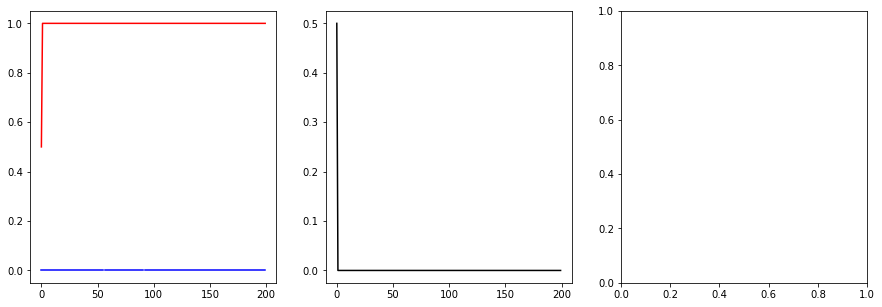

In [56]:
weights_2=baby2.fit(pd.DataFrame(X_2),pd.Series(y_2))

In [57]:
baby2.score(X_2,y_2)

1.0

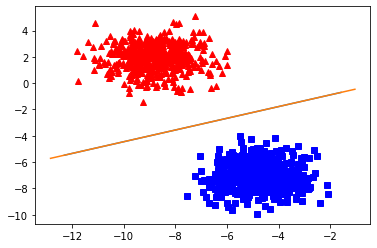

In [60]:
baby2.plot_decision_boundary(ax)
fig

# Trying other standard models

## Perceptron

In [41]:
clf = Perceptron(tol=1, random_state=0)
clf.fit(X_2,y_2)
clf2 = Perceptron(tol=1, random_state=0)
clf2.fit(X_train,y_train)

Perceptron(tol=1)

In [42]:
clf.score(X_2,y_2)
clf2.score(X_val,y_val)

0.773

## Nearest neighbours

## Linear SVM

## LogReg Classifier

## DecisionTree and RandomForest

## MultiLayerPerceptron